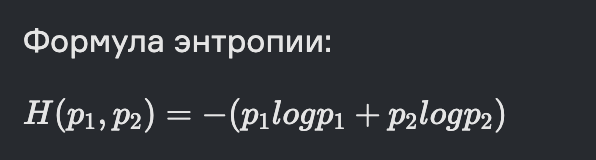
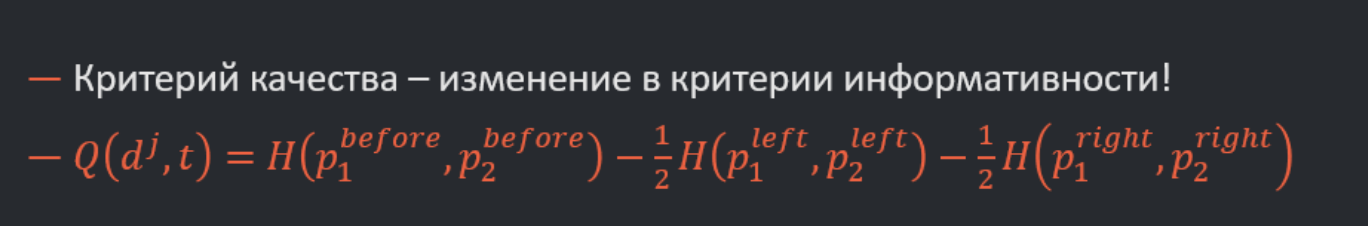
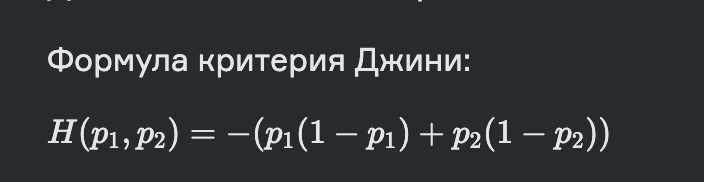
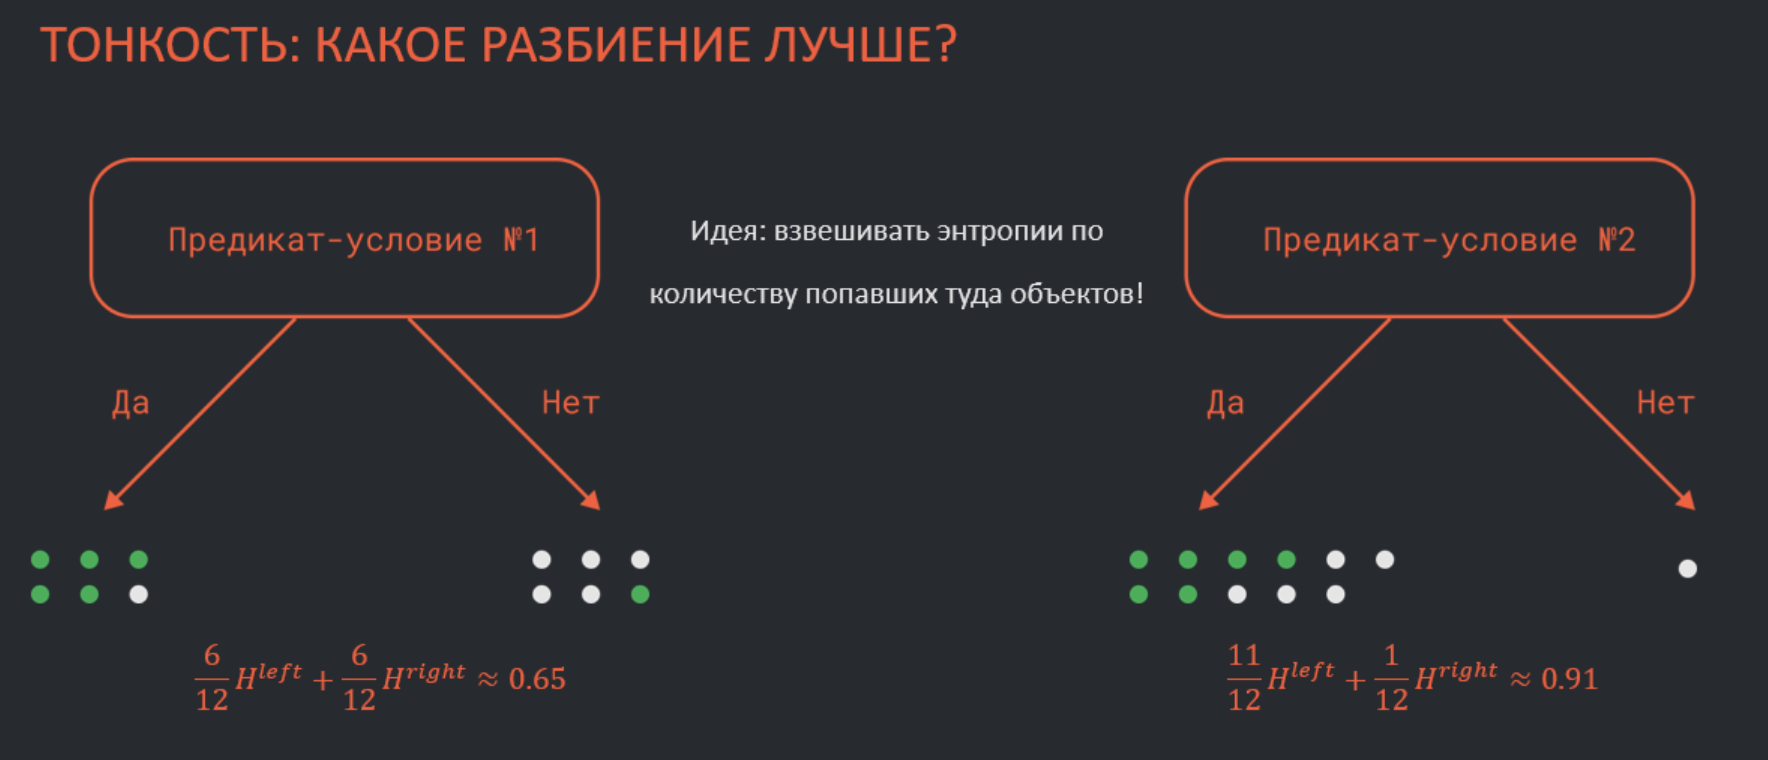

### Критерии остновок

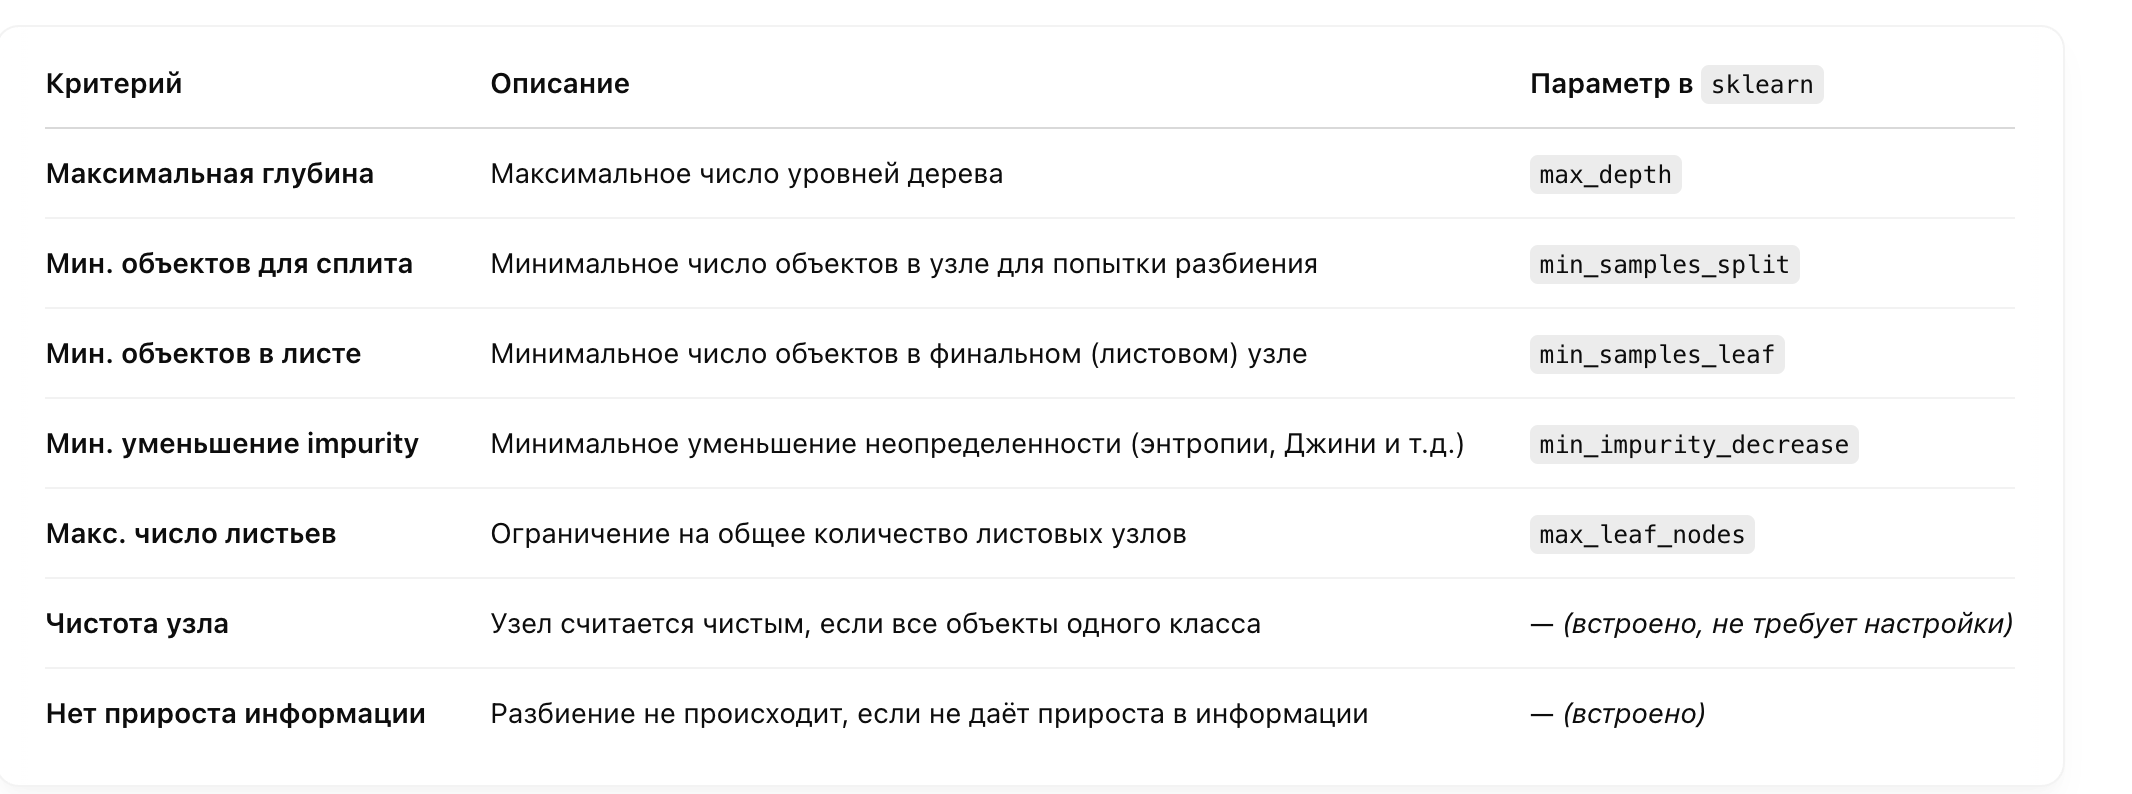

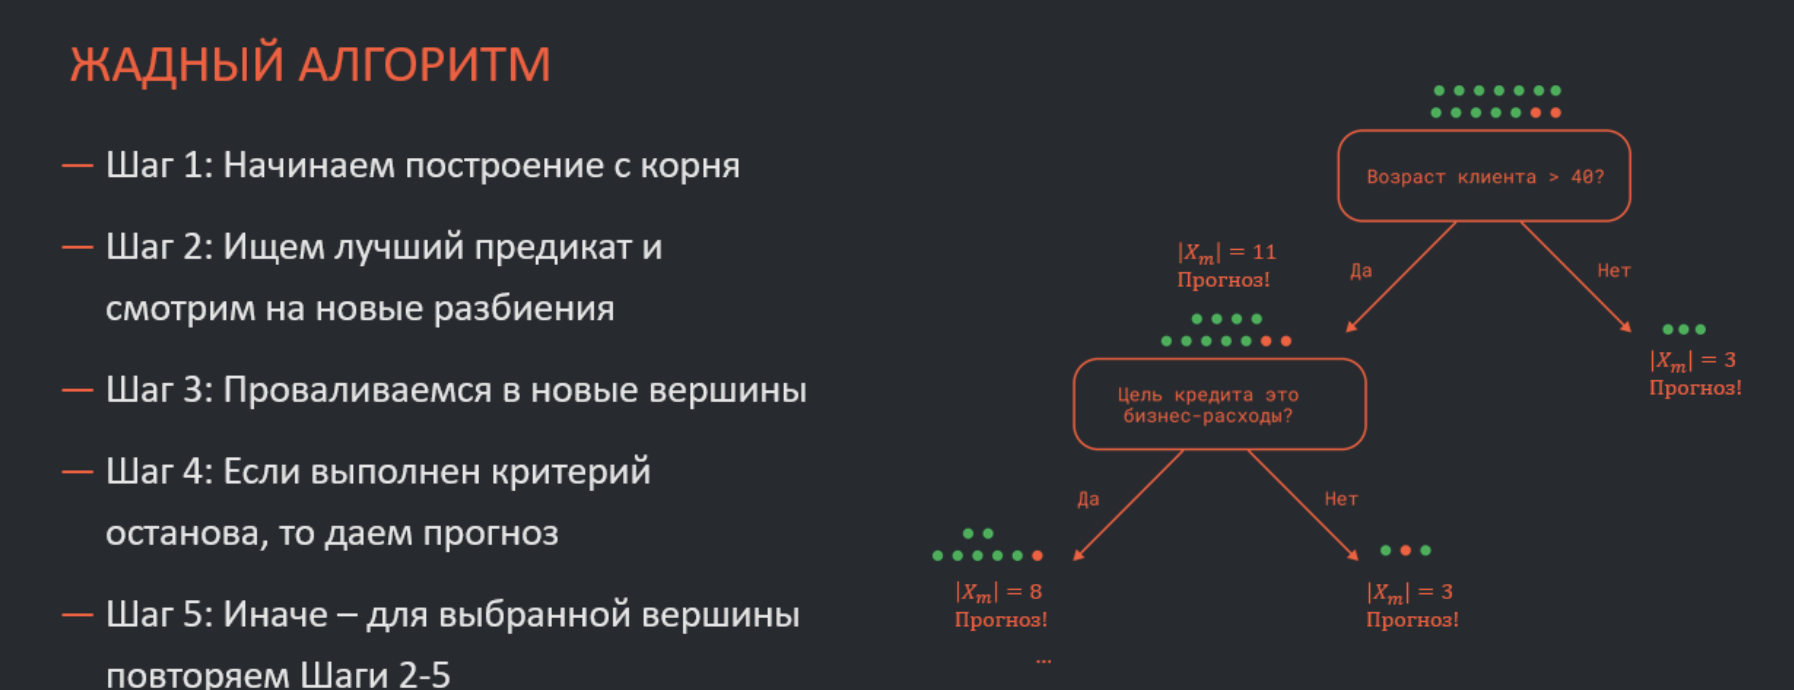

In [ ]:
from sklearn.tree import DecisionTreeClassifier # DecisionTreeRegressor

X = dataset.drop("y", axis=1)
y = dataset["y"]

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X, y)

In [ ]:
from sklearn import tree

decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
decision_tree.fit(X, y)

fig = plt.figure()
fig.set_size_inches(16, 10) 

tree.plot_tree(decision_tree,
               feature_names=X.columns,
               class_names=decision_tree.classes_.astype(int).astype(str),
               filled=True
           )
plt.show()

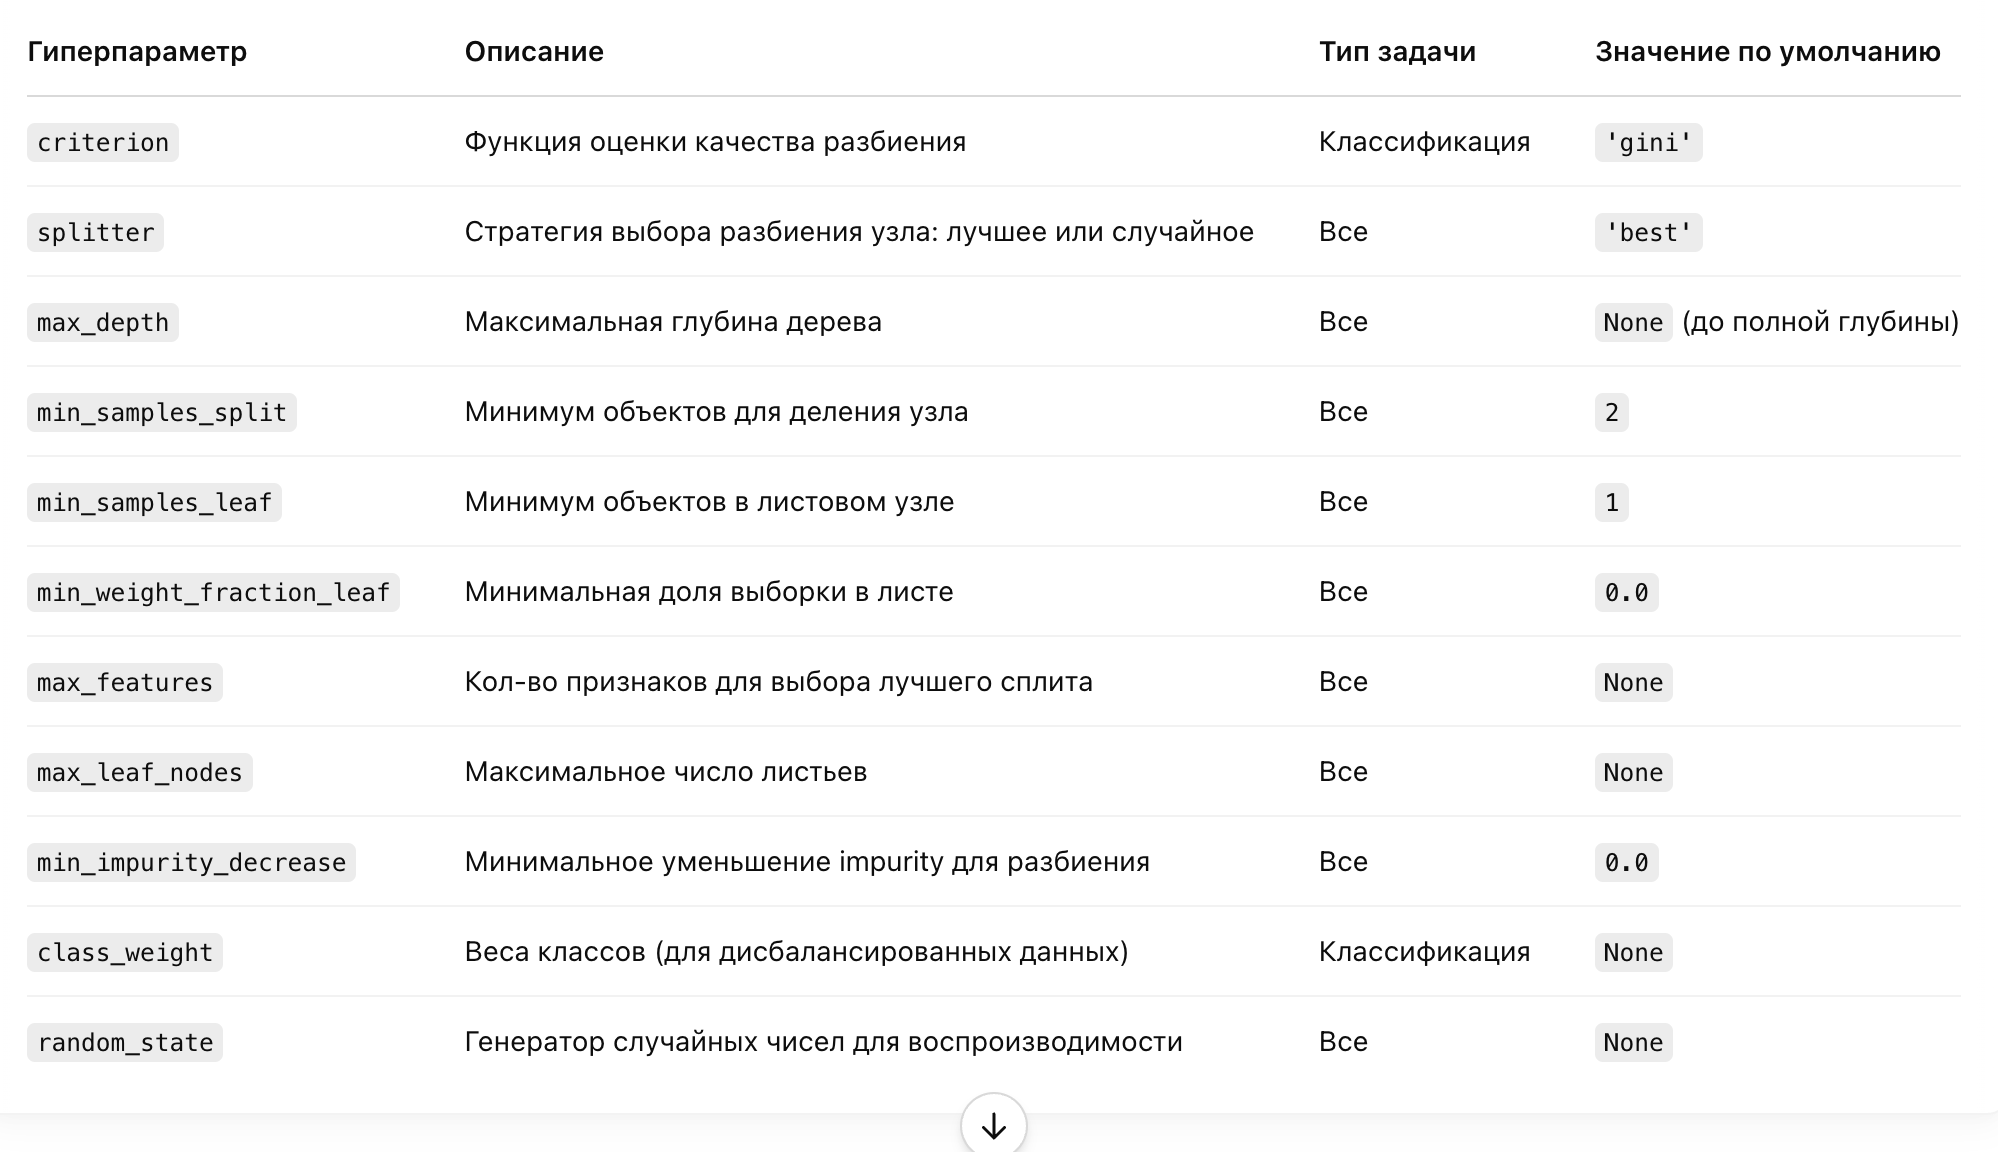

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)


In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 10) 

### Вычислим границы признакового пространства

pixel_step = 0.001

x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = pipe.predict(pd.DataFrame(np.c_[xx1.ravel(), xx2.ravel()],
                              columns=["x1", "x2"]))
Z = Z.reshape(xx1.shape)

# Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), pipe.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
    
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

pixel_step = 0.005

# Получаем границы признаков
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Генерация сетки точек
xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

# Прогноз модели на всей сетке
grid_points = pd.DataFrame(np.c_[xx1.ravel(), xx2.ravel()], columns=["x1", "x2"])
Z = pipe.predict(grid_points)
Z = Z.reshape(xx1.shape)

# Отображение областей классификации
plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired, alpha=0.8)

# Цвета для классов
colors = ["#FF5533", "#00B050", "#3366CC"]

# Отображение обучающих точек
for i, cls in enumerate(pipe.classes_):
    idx = np.where(y == cls)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=colors[i % len(colors)],
        s=30,
        edgecolors="k",
        linewidths=0.5,
        label=f"Class {cls}"
    )

# Настройка внешнего вида
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary", fontsize=16)
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

plt.show()
